### The second fundamental theorem of probability is the *Central Limit Theorem*

- Recall: the first fundamental theorem is the *Law of Large Numbers*


# The Central Limit Theorem says that if $S_{n}$ is the sum of $n$ mutually independent random variables, then the distribution function for $S_{n}$ is well approximated by the normal density function

___

# *Bernoulli Trials*

### We know that if we perform $n$ Bernoulli trials each with probability $p$, then $S_{n}$ gives the number of successes and is distributed by $b(n, p, k)$

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

from scipy.special import comb
from fractions import Fraction

In [95]:
def b(n,p,k):
    return comb(n,k)*(p**k)*((1-p)**(n-k))

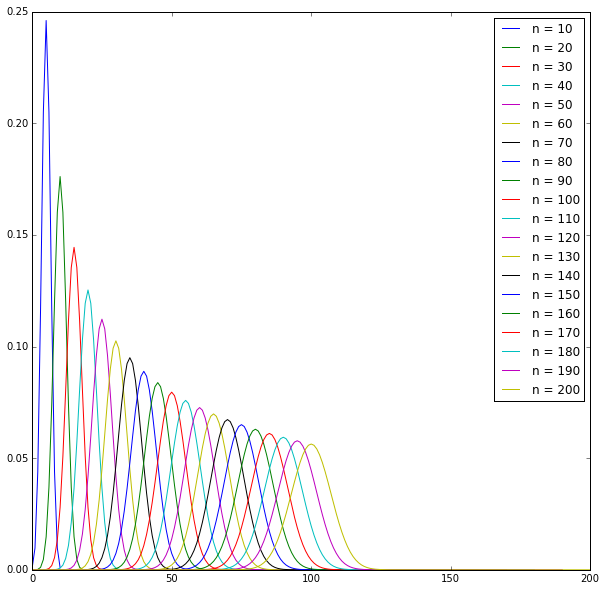

In [81]:
p = 0.5

for n in [10*x for x in range(1,21)]:
    x = np.arange(n+1)
    y = b(n, p, x)
    plt.plot(x,y, label = 'n = {}'.format(n))
plt.legend(loc = 'upper right')    
plt.show()

## We can see from this plot that if we keep $p$ fixed and increase $n$, the peak is always at $np$ but the probability gradually decreases

# *Standardized Sums*

### We can keep the distributions from drifting by defining a new random variable called the *Standardized Sum*:

# $S^{*}_{n} = \frac{S_{n} - np}{\sqrt{npq}}$

### Recall: for $S_{n}$ :$\mu = np$ and $\sigma = \sqrt{npq}$

### So this is the same idea as converting a normal distribution to a standard normal

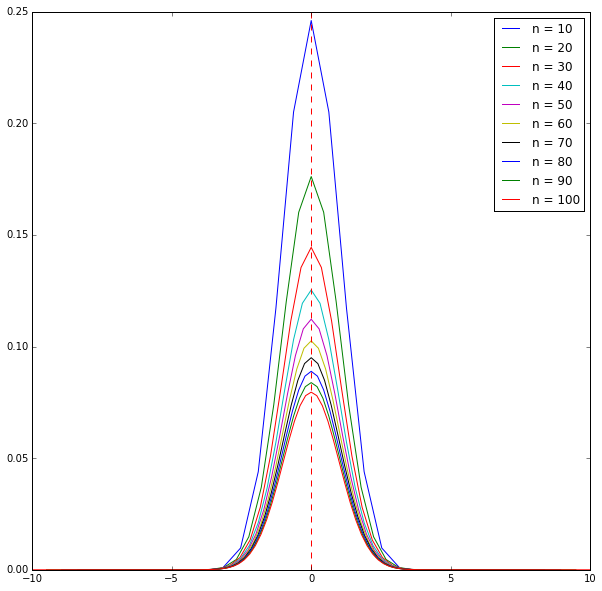

In [82]:
p = 0.5

for n in [10*x for x in range(1,11)]:
    x = np.arange(n+1)
    x_ = (x-n*p)/(np.sqrt(n*p*(1-p)))
    y = b(n, p, x)
    plt.plot(x_,y, label = 'n = {}'.format(n))
plt.axvline(0, ls = 'dashed', color = 'r')
plt.legend(loc = 'upper right')    
plt.show()

# Now, let's consider the Standardized Sum when $n=270$ and $p=0.3$

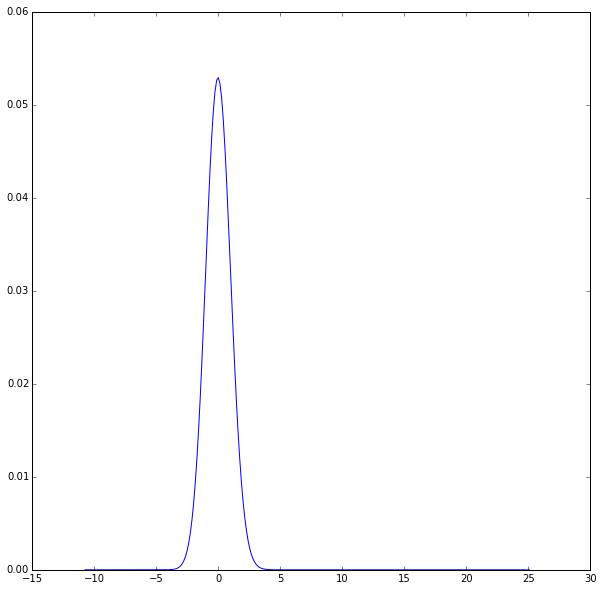

In [83]:
n = 270
p = 0.3

x = np.arange(n+1)
x_ = (x - n*p)/(np.sqrt(n*p*(1-p)))
y = b(n, p, x)

plt.plot(x_,y)
plt.show()

## Now, we can try to fit a standard normal to this distribution

In [34]:
from scipy.stats import norm

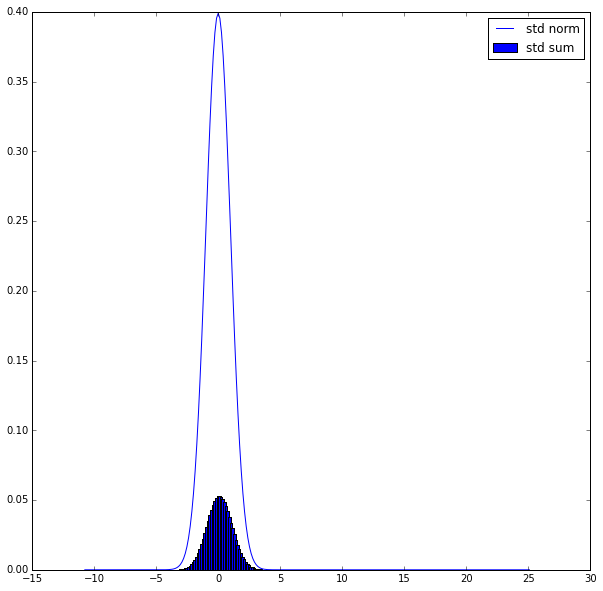

In [84]:
n = 270
p = 0.3

x = np.arange(n+1)
x_ = (x - n*p)/(np.sqrt(n*p*(1-p)))
y = b(n, p, x)

y_std_norm = norm.pdf(x_)

plt.bar(x_,y, label = 'std sum', width = 0.2)
plt.plot(x_,y_std_norm, label = 'std norm')
plt.legend()
plt.show()

## As we can see, the shapes are similar but the standard normal distribution is way bigger

## This is because the standard normal distribution is *continuous* (so the area under the curve is equal to 1) while the binomial distribution is *discrete* (so the sum of the lengths of the bar is equal to 1)

## When we plot the standardized sum, we use the same $y=b(n,p,x)$ values, but we transform the x-axis as:

# `x_ = (x-n*p)/(np.sqrt(n*p*(1-p))`

## For example, if $n=10$ and $p=0.3$, then `x`, `(x-n*p)`, `(np.sqrt(n*p*(1-p))` and `x_` are:

In [107]:
n = 10
p = 0.3
x = np.arange(11)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [105]:
x-n*p

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

- This makes sense since the mean value is 3, so it transforms all x-values to how far away they are from the mean

In [106]:
np.sqrt(n*p*(1-p))

1.4491376746189437

- This is the standard deviation for our binomial distribution

In [108]:
(x-n*p)/np.sqrt(n*p*(1-p))

array([-2.07019668, -1.38013112, -0.69006556,  0.        ,  0.69006556,
        1.38013112,  2.07019668,  2.76026224,  3.4503278 ,  4.14039336,
        4.83045892])

- So what this is doing is **transforming the distance from the mean to THE NUMBER OF STANDARD DEVIATIONS AWAY FROM THE MEAN**
    - This is like the z-score

### Therefore, if we hold $p$ constant and increase $n$, the distance between the points gets smaller

### Lets call $\epsilon = \frac{1}{\sqrt{npq}}$

### Then, if we converted the discrete distribution to continuous and solved for the area under the curve, it would be equal to the sum of the lengths of the bars multiplied by $\epsilon$

#### But the sum of the bars is 1, so the area is just $\epsilon$

## Therefore, if we divide the $b(n, p, k)$ values by $\epsilon$, the values will be scaled up to match the standard normal

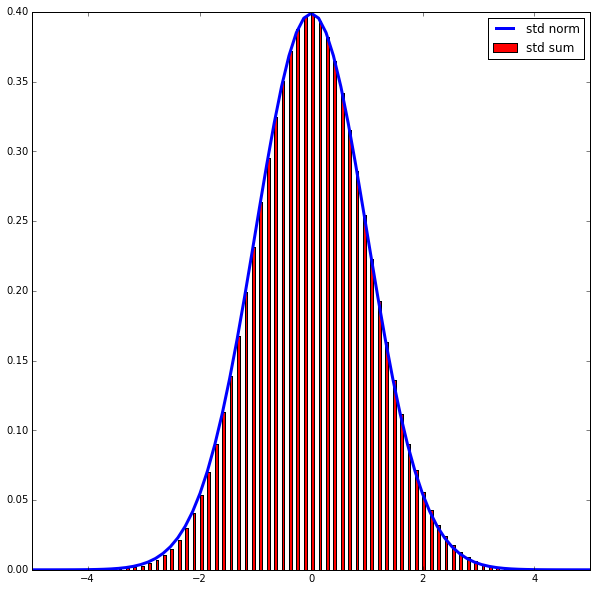

In [115]:
n = 270
p = 0.3

x = np.arange(n+1)
x_ = (x - n*p)/(np.sqrt(n*p*(1-p)))
y = b(n, p, x)*(np.sqrt(n*p*(1-p)))

y_std_norm = norm.pdf(x_)

plt.plot(x_,y_std_norm, label = 'std norm', lw = 3)
plt.bar(x_,y, label = 'std sum', width = 0.05, color = 'r')
plt.legend()
plt.xlim([-5, 5])
plt.show()

_____

# Theorem 9.1

### For the binomial distribution $b(n,p,j)$, we have

# $\lim_{n\rightarrow \infty}\sqrt{npq}\cdot b(n,p,\left \langle np + x\sqrt{npq} \right \rangle) = \phi(x)$

### where $\phi(x)$ is the standard normal density

# Note: $\left \langle x \right \rangle = $`round(x)` i.e. the nearest integer

___

# *Approximating Binomial Distributions*

### We can reverse Theorem 9.1 to approximate the binomial distribution

### If we let $j = np + x\sqrt{npq} \implies x = \frac{j-np}{\sqrt{npq}} \implies b(n,p,j) \approx \frac{\phi(x)}{\sqrt{npq}} = \frac{\phi \left (\frac{j-np}{\sqrt{npq}} \right )}{\sqrt{npq}}$

## Example

### We can use the expression above to estimate the probability of exactly 55 heads in 100 tosses of a coin

# $n = 100 \implies np = 50$, $npq = 25 \implies x = \frac{j - 50}{5}$

# $\implies b(100, 0.5, 55) \approx \frac{\phi(\frac{55 - 50}{5})}{5} = \frac{\phi(1)}{5} = 0.0484$

# *Central Limit Theorem for Bernoulli Trials*

# Theorem 9.2

### Let $S_{n}$ be the number of successes in $n$ Bernoulli trials with probability $p$, and let $a$ and $b$ be two real fixed values. Then

# $\lim_{n\rightarrow \infty} P\left ( a \leq \frac{S_{n} - np}{\sqrt{npq}} \leq b \right ) = \int_{a}^{b}\phi(x)dx$

_____

# *Approximation of Binomial Probabilities*

### If we want to use our approximation above to estimate, for example, the probability of getting between 45 and 55 heads in 100 flips, we would integrate:

# $P(S_{100}\leq 45) = \int_{-1}^{1}\phi(x)dx$

### But, it turns out that we can improve our approximation by adjusting our values by 0.5 away from the mean (i.e. using this approximation to calculate the probability of getting between 44.5 and 55.5 heads)

## This means we integrate:

# $P(S_{100}\leq 45) = \int_{-1.1}^{1.1}\phi(x)dx$

### Let's compare these two to $b(100,0.5,j)$ for $j$ in $[45,...,55]$

In [119]:
norm.cdf(1) - norm.cdf(-1)

0.68268949213708585

In [120]:
norm.cdf(1.1) - norm.cdf(-1.1)

0.72866787810723466

In [121]:
total = 0
for j in range(45,56):
    total += b(100, 0.5, j)    
    
total

0.728746975926165

# So the second estimate is way closer

## Example

### Dartmouth would like to have 1050 freshmen. The college cannot accomodate more than 1060. Assume that each applicant accepts with probability 0.6. If the college sends acceptance letters to 1700 students, what is the probability that it will have too many acceptances?

### If it sends 1700 acceptance letters, the expected number of acceptances is $0.6 \cdot 1700 = 1020$

### The standard deviation is $\sqrt{1700\cdot 0.6 \cdot 0.4} = 20.2$

### So $P(\text{Too many freshmen}) = \int_{-\infty}^{\frac{1060 - 1020 + 0.5}{20.2}}\phi(x)dx = \int_{-\infty}^{2.005}\phi(x)dx$

In [123]:
1-norm.cdf(2.005)

0.022481523518159685

## About 2.24% chance they'll have too many freshmen